In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools

from datetime import datetime
from functools import partial

import warnings
warnings.filterwarnings("ignore")


In [2]:
# importing data
train=pd.read_csv('train.csv')

In [3]:
# viewing unique families of products
train['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

### Performing forecasting for 'GROCERY I' family of products as its the highest selling product

In [4]:
grocery1 = train[train['family'] == 'GROCERY I']
grocery1

,id,date,store_nbr,family,sales,onpromotion
12,12,2013-01-01,1,GROCERY I,0.000,0.0
45,45,2013-01-01,10,GROCERY I,0.000,0.0
78,78,2013-01-01,11,GROCERY I,0.000,0.0
111,111,2013-01-01,12,GROCERY I,0.000,0.0
144,144,2013-01-01,13,GROCERY I,0.000,0.0
...,...,...,...,...,...,...
3000735,3000735,2017-08-15,54,GROCERY I,4235.000,483.0
3000768,3000768,2017-08-15,6,GROCERY I,4334.000,779.0
3000801,3000801,2017-08-15,7,GROCERY I,3678.000,737.0
3000834,3000834,2017-08-15,8,GROCERY I,4035.000,786.0


In [5]:
# Dropping the rest of the columns
cols = ['id','store_nbr','family','onpromotion']
grocery1.drop(cols,axis =1,inplace=True)

In [6]:
# Viewing the data
grocery1

,date,sales
12,2013-01-01,0.000
45,2013-01-01,0.000
78,2013-01-01,0.000
111,2013-01-01,0.000
144,2013-01-01,0.000
...,...,...
3000735,2017-08-15,4235.000
3000768,2017-08-15,4334.000
3000801,2017-08-15,3678.000
3000834,2017-08-15,4035.000


In [7]:
# Converting to date format
to_datetime_fmt = partial(pd.to_datetime)

#performing a group by on date and taking the sum of sales
grocery1 = grocery1.groupby('date')['sales'].sum()
grocery1=grocery1.reset_index()


In [8]:
#converting object format to date format
grocery1['date'] = grocery1['date'].apply(to_datetime_fmt)

#Setting date column as the index
grocery1.set_index('date',inplace=True)
grocery1


,sales
date,
2013-01-01,700.000
2013-01-02,202020.000
2013-01-03,144878.000
2013-01-04,135754.000
2013-01-05,188356.000
...,...
2017-08-11,238221.922
2017-08-12,238627.633
2017-08-13,258442.452


Re-sampling the data and taking mean

In [9]:
# Re-sampling the data and taking mean
y = grocery1['sales'].resample('MS').mean()

In [10]:
# Viewing the re-sampled data
y

date
2013-01-01    130072.258065
2013-02-01    139978.571429
2013-03-01    150962.806452
2013-04-01    151800.466667
2013-05-01    155035.451613
2013-06-01    163989.066667
2013-07-01    156837.000000
2013-08-01    163793.870968
2013-09-01    165986.466667
2013-10-01    162270.258065
2013-11-01    167577.400000
2013-12-01    215060.200000
2014-01-01    159299.210871
2014-02-01    167506.321429
2014-03-01    178930.506742
2014-04-01    168538.178133
2014-05-01    171495.232839
2014-06-01    175447.057233
2014-07-01    170523.252387
2014-08-01    177523.913419
2014-09-01    178275.478400
2014-10-01    178866.689710
2014-11-01    190251.140500
2014-12-01    248848.504833
2015-01-01    179284.018677
2015-02-01    188730.567321
2015-03-01    198383.643387
2015-04-01    193180.057633
2015-05-01    205606.338129
2015-06-01    195175.382467
2015-07-01    199814.816194
2015-08-01    211554.773387
2015-09-01    214411.680300
2015-10-01    225325.685742
2015-11-01    222920.453700
2015-12-01    2

<AxesSubplot:xlabel='date'>

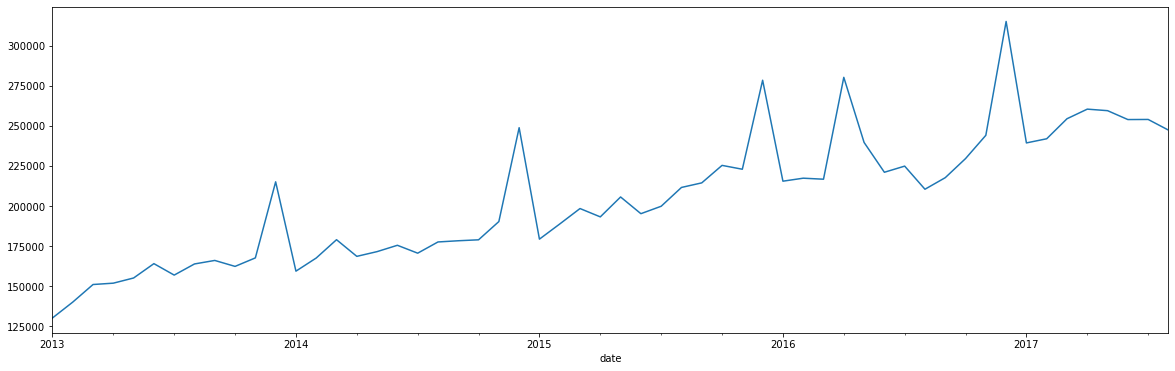

In [11]:
# viewing the sales trend for each date
y.plot(figsize=(20,6))

### Applyling Seasonal decomposition using moving averages.

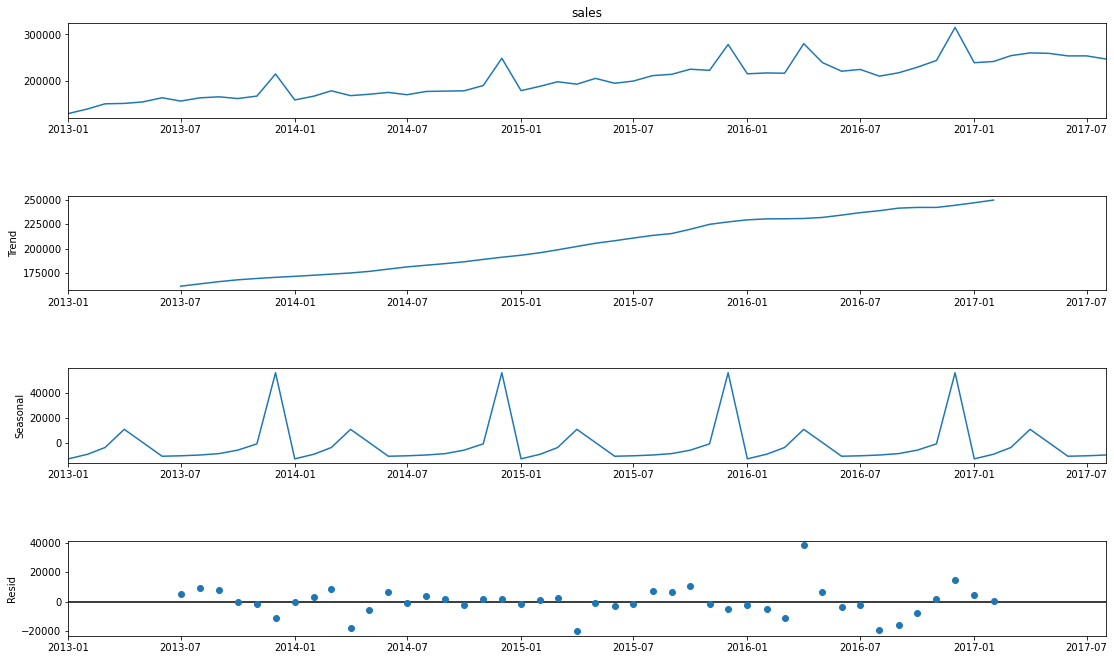

In [12]:
from pylab import rcParams


decomposition = sm.tsa.seasonal_decompose(y,model='additive')
fig = decomposition.plot()

fig.set_size_inches(18.5, 10.5)
plt.show()

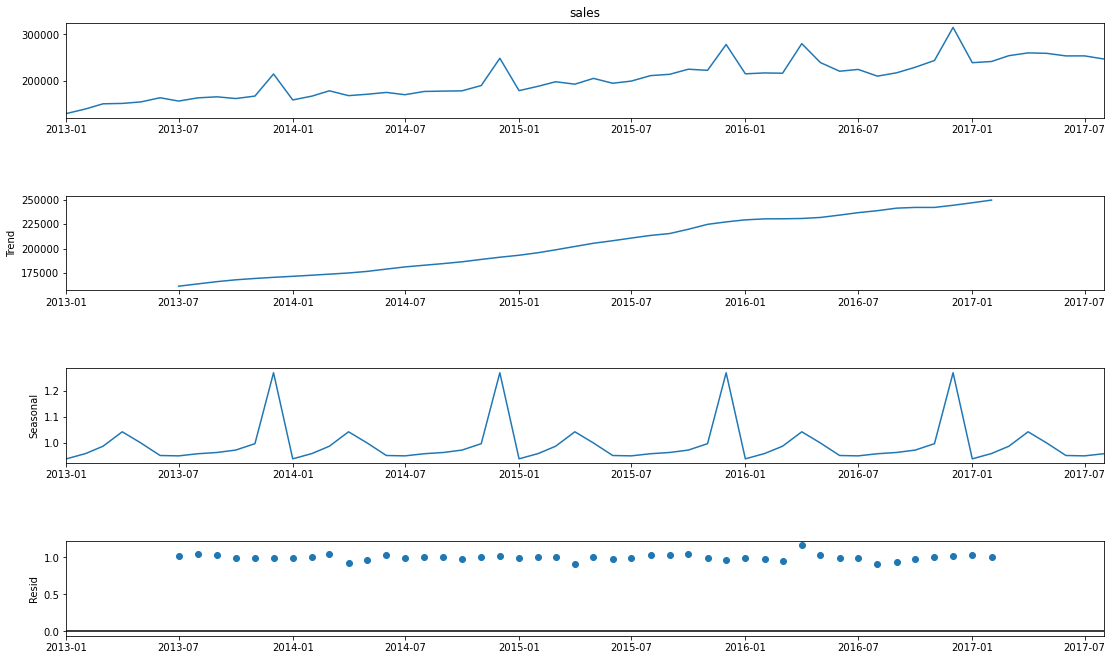

In [13]:
decomposition = sm.tsa.seasonal_decompose(y,model='multiplicative')
fig = decomposition.plot()
fig.set_size_inches(18.5, 10.5)
plt.show()

## Time series forcating with ARIMA (Autoregressive Integrated Moving Average.)

In [14]:
# for testing purpose using pdq =(1,10), seasonal_order= (1,1,0,12)
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12), #monthly basis
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              sales   No. Observations:                   56
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -334.388
Date:                            Mon, 13 Dec 2021   AIC                            674.775
Time:                                    15:53:37   BIC                            678.979
Sample:                                01-01-2013   HQIC                           676.120
                                     - 08-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4085      0.144     -2.842      0.004      -0.690      -0.127
ar.S.L12      -0.7029      0.380   

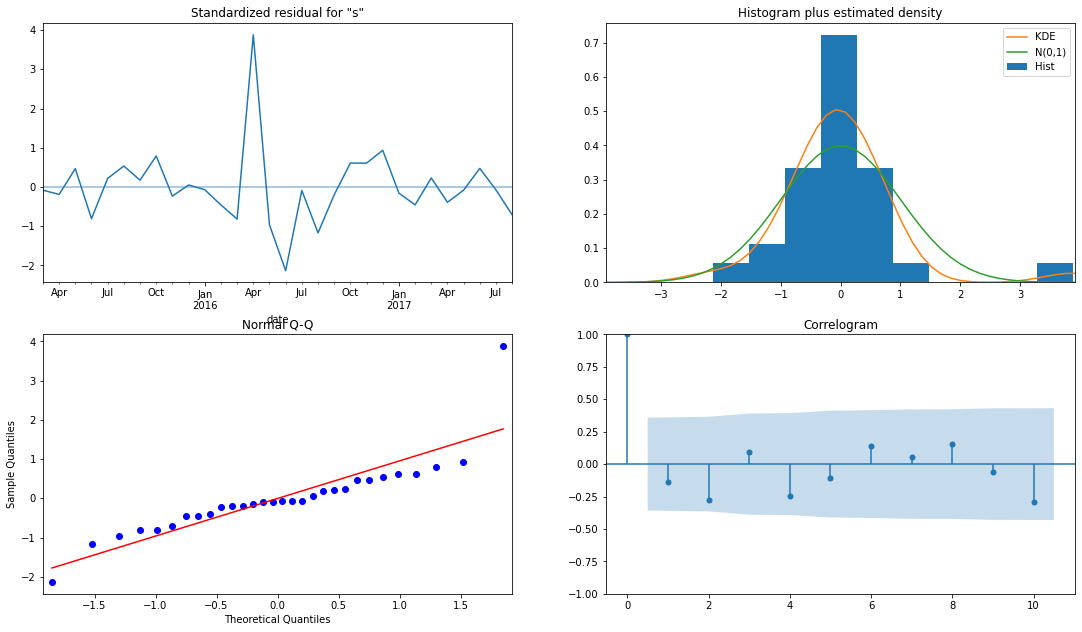

In [15]:
#Plotting results
fig=results.plot_diagnostics()
fig.set_size_inches(18.5, 10.5)
plt.show()

### Forecasting and validating

In [16]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

#viewing the predicted value interval
pred_ci

,lower sales,upper sales
date,,
2017-01-01,207855.322811,276310.852618
2017-02-01,215662.851288,284118.381095
2017-03-01,216189.600446,284645.130253
2017-04-01,233036.669512,301492.199320
2017-05-01,226644.483123,295100.012930
2017-06-01,211418.590162,279874.119969
2017-07-01,221115.480700,289571.010507
2017-08-01,225505.544778,293961.074585


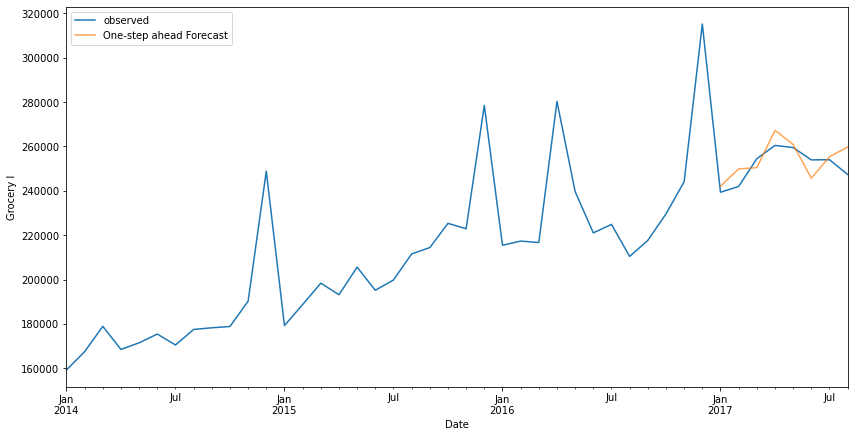

In [17]:
# Ploting the validation Results
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.set_xlabel('Date')
ax.set_ylabel('Grocery I')
plt.legend()
plt.show()

In [18]:
# Calculating MAPE for the validation data
y_forecasted = pred.predicted_mean
Y_actual = y['2017-01-01':]
mape = np.mean(np.abs((Y_actual - y_forecasted)/Y_actual))*100
print('The MAPE of our forecasts is '+str(round(mape, 2)))

The MAPE of our forecasts is 2.25


In [22]:
# Peforming future forecast
pred_uc = results.get_forecast(steps=25)
pred_ci = pred_uc.conf_int()

pred_ci

,lower sales,upper sales
2017-09-01,221608.615461,290064.145268
2017-10-01,225509.141822,305044.166194
2017-11-01,221135.425588,316114.308134
2017-12-01,275455.751051,381538.155976
2018-01-01,203339.651475,320257.148169
2018-02-01,200566.504127,327097.113333
2018-03-01,199331.056415,334908.188670
2018-04-01,241583.102633,385595.908958
2018-05-01,208743.519695,360741.462806
2018-06-01,190221.136879,349798.559863


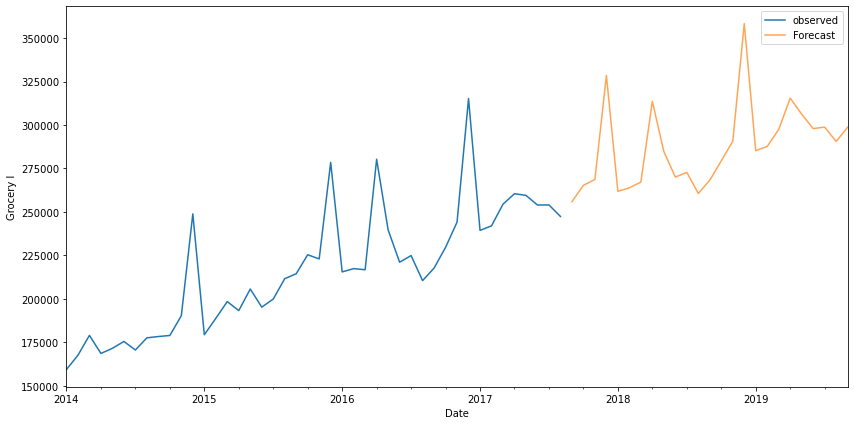

In [23]:
# visualizing future forecast
ax = y['2014':].plot(label='observed')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))

ax.set_xlabel('Date')
ax.set_ylabel('Grocery I')
plt.legend()
plt.show()

### Performing forecasting for 'Store 44' as it has the highest sales

In [24]:
# Filtering data based on store_nbr
store44 = train[train['store_nbr'] == 44]
store44

,id,date,store_nbr,family,sales,onpromotion
1254,1254,2013-01-01,44,AUTOMOTIVE,0.000,0.0
1255,1255,2013-01-01,44,BABY CARE,0.000,0.0
1256,1256,2013-01-01,44,BEAUTY,0.000,0.0
1257,1257,2013-01-01,44,BEVERAGES,0.000,0.0
1258,1258,2013-01-01,44,BOOKS,0.000,0.0
...,...,...,...,...,...,...
3000388,3000388,2017-08-15,44,POULTRY,909.194,41.0
3000389,3000389,2017-08-15,44,PREPARED FOODS,329.522,9.0
3000390,3000390,2017-08-15,44,PRODUCE,7239.617,236.0
3000391,3000391,2017-08-15,44,SCHOOL AND OFFICE SUPPLIES,345.000,12.0


In [25]:
# Dropping the rest of the columns
cols = ['id','store_nbr','family','onpromotion']
store44.drop(cols,axis =1,inplace=True)

In [26]:
# Converting to date format
to_datetime_fmt = partial(pd.to_datetime)

# performing a group by on date and taking the sum of sales
store44 = store44.groupby('date')['sales'].sum()
store44=store44.reset_index()


In [27]:
# Viewing the data
store44

,date,sales
0,2013-01-01,0.000000
1,2013-01-02,30095.181000
2,2013-01-03,20447.057000
3,2013-01-04,22795.799000
4,2013-01-05,31382.508000
...,...,...
1679,2017-08-11,43330.500000
1680,2017-08-12,41559.973000
1681,2017-08-13,45604.445000
1682,2017-08-14,35617.528004


In [28]:
# Converting object format to date format
store44['date'] = store44['date'].apply(to_datetime_fmt)

# Setting date column as the index
store44.set_index('date',inplace=True)
store44


,sales
date,
2013-01-01,0.000000
2013-01-02,30095.181000
2013-01-03,20447.057000
2013-01-04,22795.799000
2013-01-05,31382.508000
...,...
2017-08-11,43330.500000
2017-08-12,41559.973000
2017-08-13,45604.445000


In [30]:
# Re-sampling the data and taking the mean value
y = store44['sales'].resample('MS').mean()

<AxesSubplot:xlabel='date'>

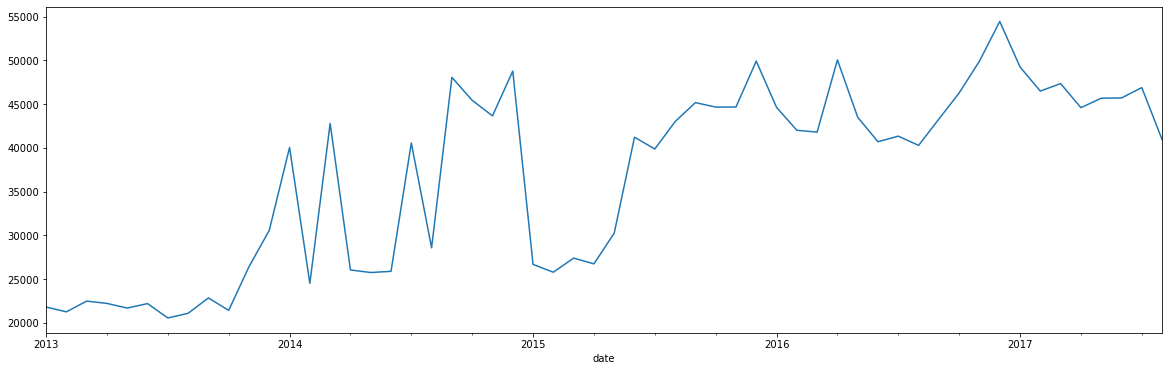

In [31]:
# viewing the sales trend for each date
y.plot(figsize=(20,6))

### Applyling Seasonal decomposition using moving averages.

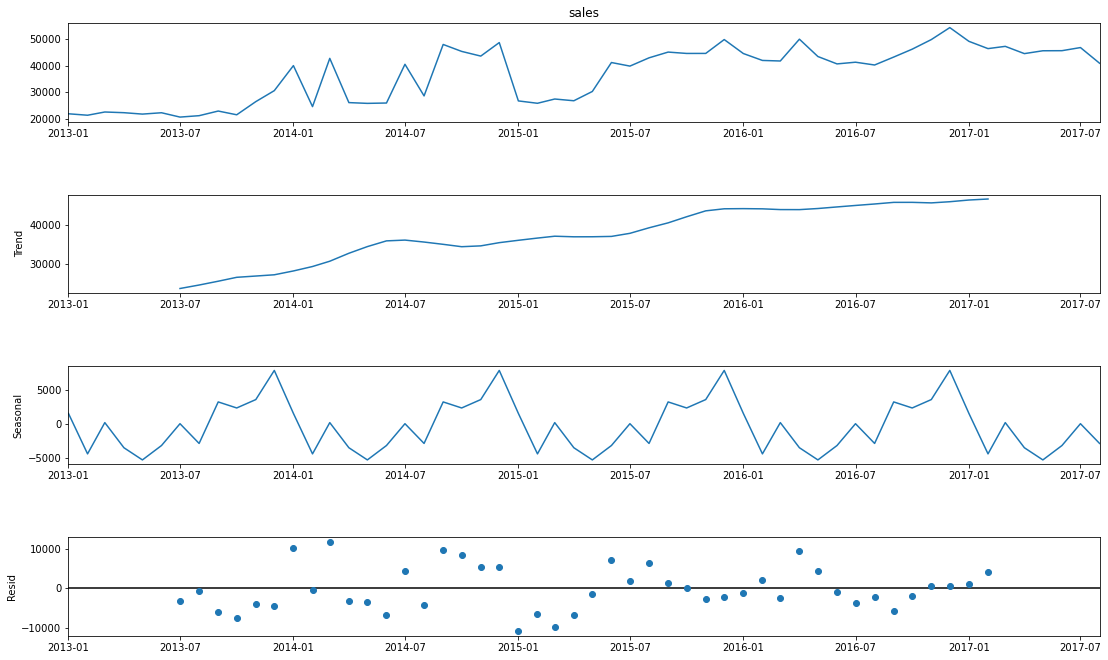

In [32]:
decomposition = sm.tsa.seasonal_decompose(y,model='additive')
fig = decomposition.plot()

fig.set_size_inches(18.5, 10.5)
plt.show()

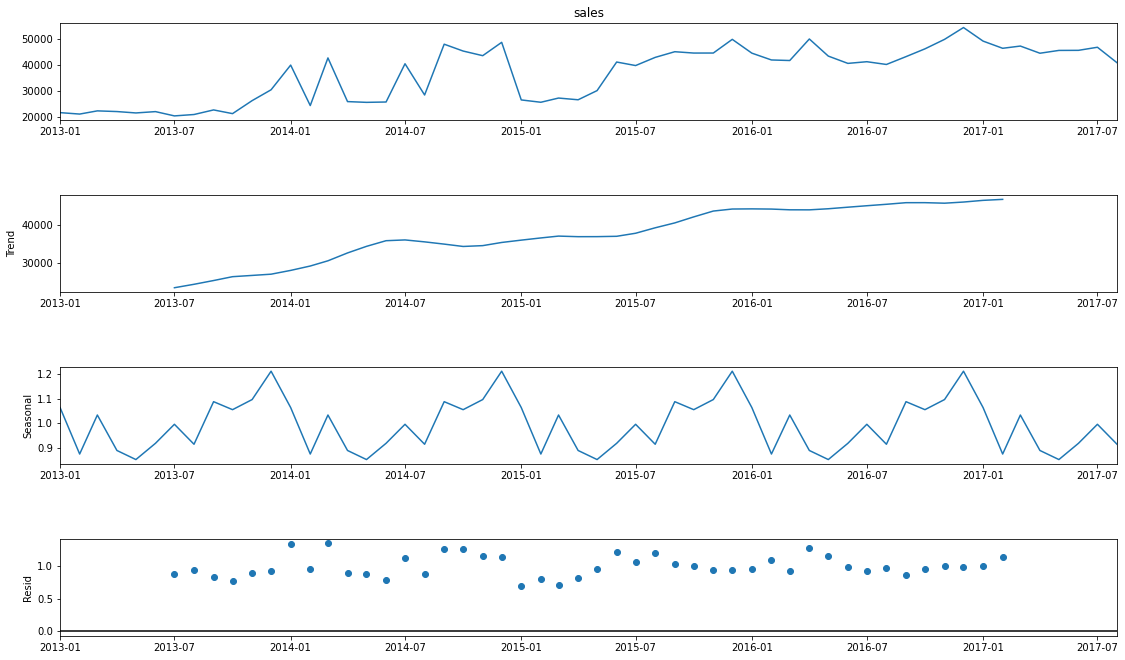

In [33]:
decomposition = sm.tsa.seasonal_decompose(y,model='multiplicative')
fig = decomposition.plot()

fig.set_size_inches(18.5, 10.5)
plt.show()

## Time series forcating with ARIMA (Autoregressive Integrated Moving Average.) for Store 44

In [34]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12), #monthly basis
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              sales   No. Observations:                   56
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -303.187
Date:                            Mon, 13 Dec 2021   AIC                            612.374
Time:                                    15:57:01   BIC                            616.578
Sample:                                01-01-2013   HQIC                           613.719
                                     - 08-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4776      0.165     -2.897      0.004      -0.801      -0.155
ar.S.L12      -0.4778      0.119   

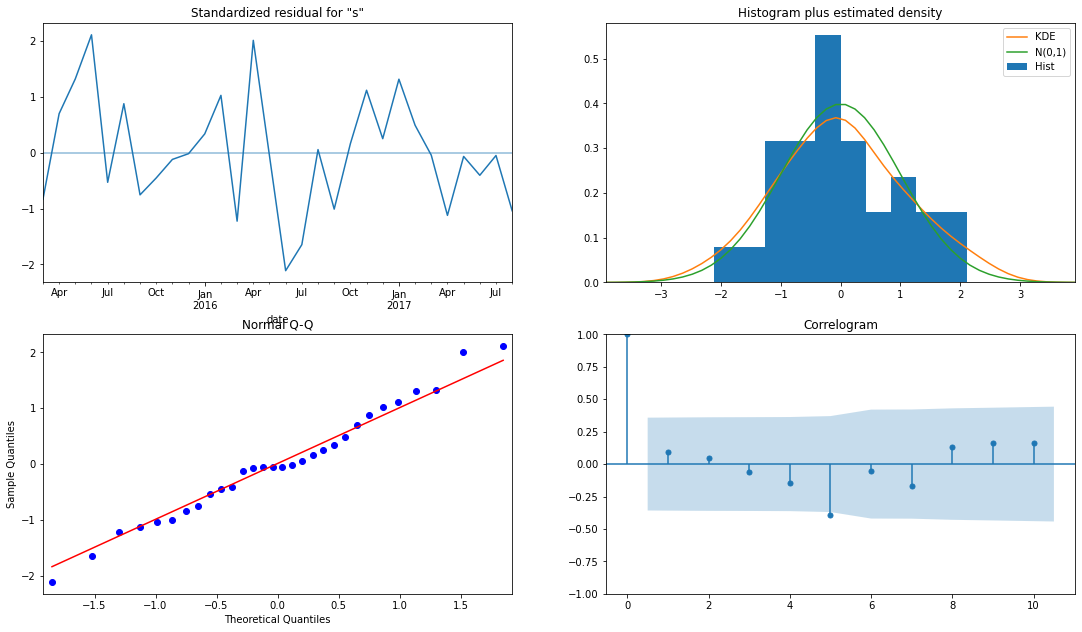

In [35]:
#Plotting results
fig=results.plot_diagnostics()
fig.set_size_inches(18.5, 10.5)
plt.show()

### Forecasting and validating

In [36]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

# viewing the predicted value interval
pred_ci

,lower sales,upper sales
date,,
2017-01-01,29829.479057,53063.302576
2017-02-01,31965.347057,55199.170575
2017-03-01,35999.479789,59233.303307
2017-04-01,39637.921170,62871.744688
2017-05-01,34458.863224,57692.686742
2017-06-01,36490.995786,59724.819304
2017-07-01,35573.485680,58807.309198
2017-08-01,35509.398163,58743.221681


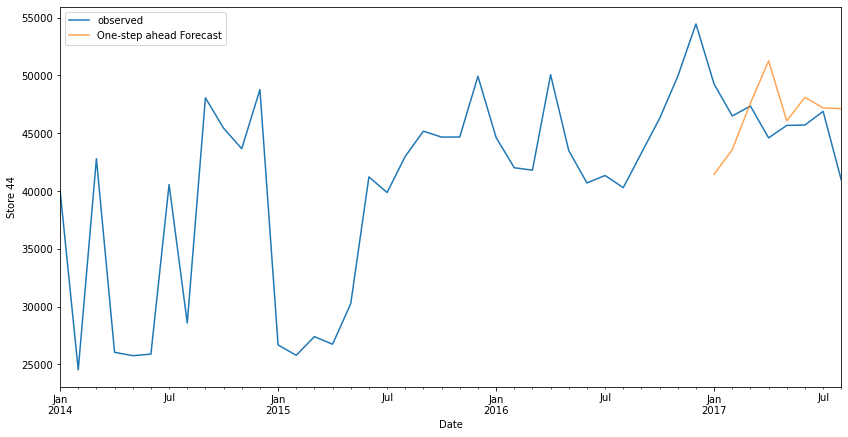

In [37]:
# Plotting validation forecast values
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.set_xlabel('Date')
ax.set_ylabel('Store 44')
plt.legend()
plt.show()

In [38]:
# Calculating the MAPE for the validation forecast
y_forecasted = pred.predicted_mean
Y_actual = y['2017-01-01':]
mape = np.mean(np.abs((Y_actual - y_forecasted)/Y_actual))*100
print('The MAPE of our forecasts is '+str(round(mape, 2)))

The MAPE of our forecasts is 7.42


In [39]:
# Creating transformation of sales data

# Calculating the log of the sales data
store44['sales_log'] = np.log(store44['sales'])

# Calculating the square root of the sales data
store44['sales_sqrt'] = np.sqrt(store44['sales'])

# Calculating the cubed root of the sales data
store44['sales_cbrt'] = np.cbrt(store44['sales'])

,sales_log
date,
2013-01-01,10.438651
2013-01-02,10.312120
2013-01-03,9.925594
2013-01-04,10.034332
2013-01-05,10.354006
...,...
2017-08-11,10.676612
2017-08-12,10.634893
2017-08-13,10.727760


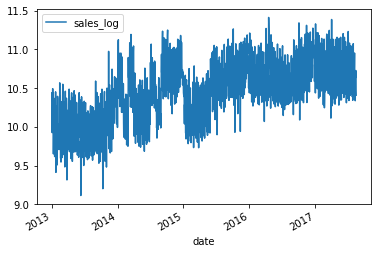

In [41]:
# Viewing log transformed sales data
y = store44['sales_log']

y=pd.DataFrame(y)
y.replace([np.inf, -np.inf], np.nan, inplace=True)
y.replace(np.nan, y.sales_log.mean(), inplace=True)

y.plot()
y

In [43]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12), #monthly basis
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())


                                     SARIMAX Results                                      
Dep. Variable:                          sales_log   No. Observations:                 1684
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -831.424
Date:                            Mon, 13 Dec 2021   AIC                           1668.848
Time:                                    16:00:04   BIC                           1685.088
Sample:                                         0   HQIC                          1674.868
                                           - 1684                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0089      0.028     -0.320      0.749      -0.063       0.046
ar.S.L12      -0.6406      0.022   

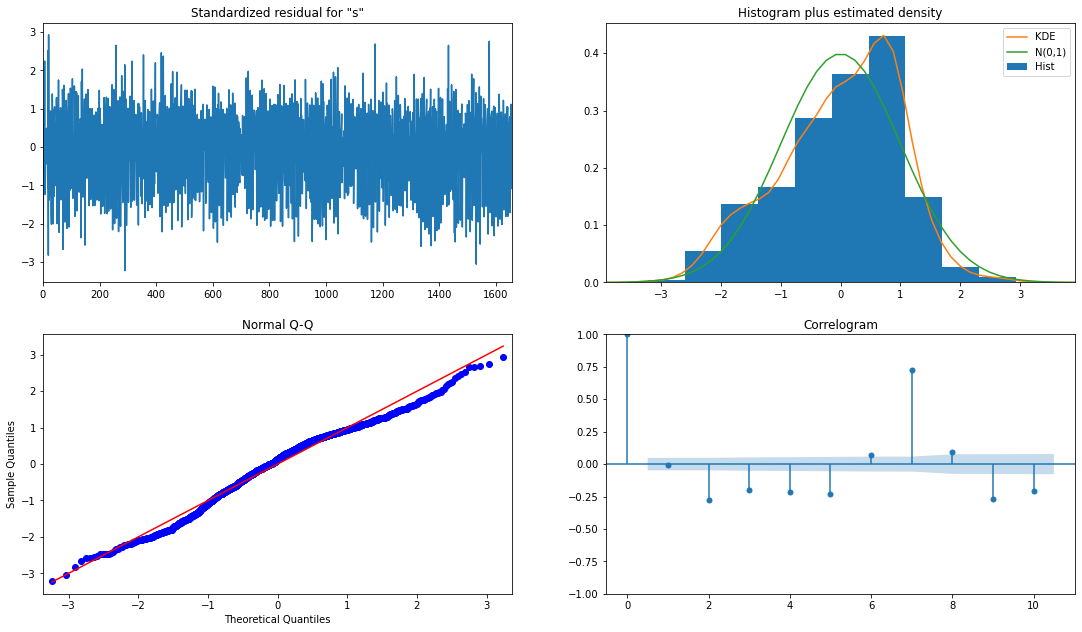

In [44]:
# Plotting results
fig=results.plot_diagnostics()
fig.set_size_inches(18.5, 10.5)
plt.show()



In [45]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

#viewing the predicted value interval
pred_ci

,lower sales_log,upper sales_log
date,,
2017-01-01,9.854474,11.420607
2017-01-02,9.488012,11.054145
2017-01-03,10.763949,12.330082
2017-01-04,10.169667,11.735800
2017-01-05,10.303124,11.869257
...,...,...
2017-08-11,9.446928,11.013061
2017-08-12,9.875578,11.441711
2017-08-13,9.694726,11.260859


In [50]:
y_forecasted = pred.predicted_mean
Y_actual = y['2017-01-01':]
mape = np.mean(np.abs((Y_actual - y_forecasted)/Y_actual))*100
print('The MAPE of our forecasts is '+str(round(mape, 2)))

The MAPE of our forecasts is 3.1


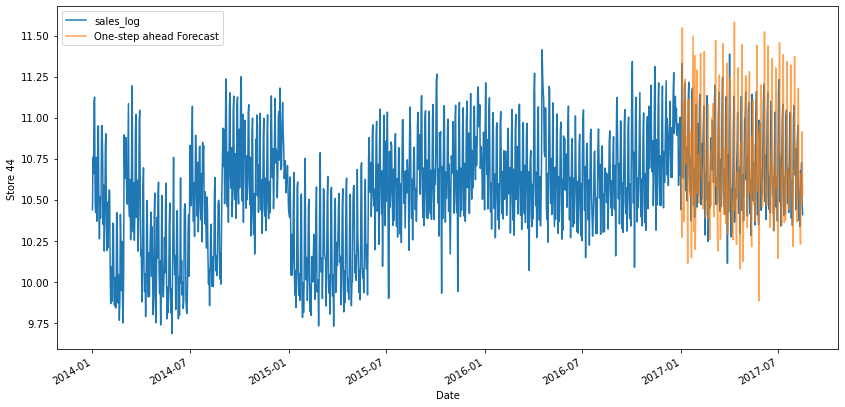

In [229]:
# Ploting validation forecast
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.set_xlabel('Date')
ax.set_ylabel('Store 44')
plt.legend()
plt.show()